# ECS8052-Knowledge Engineering Assignment

# **Importing Important Libraries, Fetching files and Loading Data**

In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
datadir = 'primekg'
if not os.path.exists(datadir):
    os.mkdir(datadir)

In [4]:
data = pd.read_csv("primekg/kg.csv", low_memory=False)

In [5]:
data.head()

,relation,display_relation,x_index,x_id,x_type,x_name,x_source,y_index,y_id,y_type,y_name,y_source
0,protein_protein,ppi,0,9796,gene/protein,PHYHIP,NCBI,8889,56992,gene/protein,KIF15,NCBI
1,protein_protein,ppi,1,7918,gene/protein,GPANK1,NCBI,2798,9240,gene/protein,PNMA1,NCBI
2,protein_protein,ppi,2,8233,gene/protein,ZRSR2,NCBI,5646,23548,gene/protein,TTC33,NCBI
3,protein_protein,ppi,3,4899,gene/protein,NRF1,NCBI,11592,11253,gene/protein,MAN1B1,NCBI
4,protein_protein,ppi,4,5297,gene/protein,PI4KA,NCBI,2122,8601,gene/protein,RGS20,NCBI


In [6]:
print(type(data['x_type']))
print(type(data['relation']))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


# **Part: 1** **Data Exploration**

# **Question 1.1: How many different types of relation, and how many of each type of relation are there?**

In [9]:
# Count unique relation types in a specific column (e.g., "RelationType")
relation_counts = data["relation"].value_counts()

# Print results
print(f"Total distinct relation types: {relation_counts.count()}")
print("Counts of each relation type:")
print(relation_counts)

Total distinct relation types: 30
Counts of each relation type:
relation
anatomy_protein_present       3036406
drug_drug                     2672628
protein_protein                642150
disease_phenotype_positive     300634
bioprocess_protein             289610
cellcomp_protein               166804
disease_protein                160822
molfunc_protein                139060
drug_effect                    129568
bioprocess_bioprocess          105772
pathway_protein                 85292
disease_disease                 64388
contraindication                61350
drug_protein                    51306
anatomy_protein_absent          39774
phenotype_phenotype             37472
anatomy_anatomy                 28064
molfunc_molfunc                 27148
indication                      18776
cellcomp_cellcomp                9690
phenotype_protein                6660
off-label use                    5136
pathway_pathway                  5070
exposure_disease                 4608
exposure_exposu

##Total Relations in data

In [11]:
print(f"There are {len(data["relation"])}")

There are 8100498


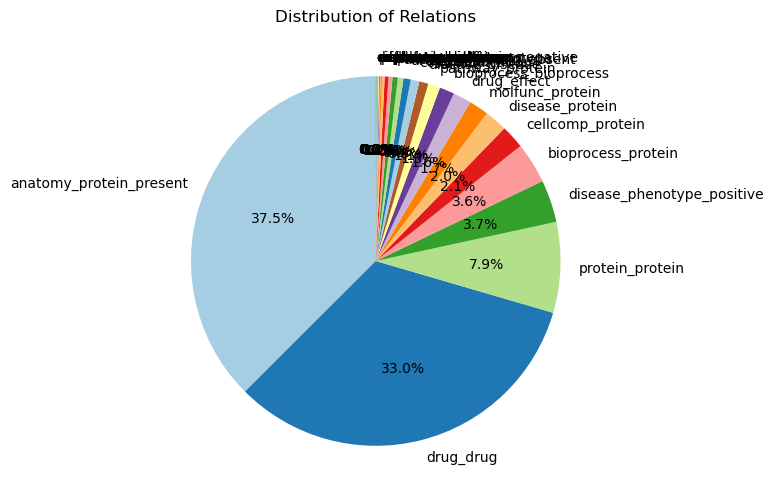

In [12]:
# Plot the pie chart
plt.figure(figsize=(8, 6))  # Set the figure size
relation_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Add a title
plt.title("Distribution of Relations")

# Display the plot
plt.ylabel("")  # Optional: remove the default y-label
plt.show()

Relation counts to visualize in better way through bar chart

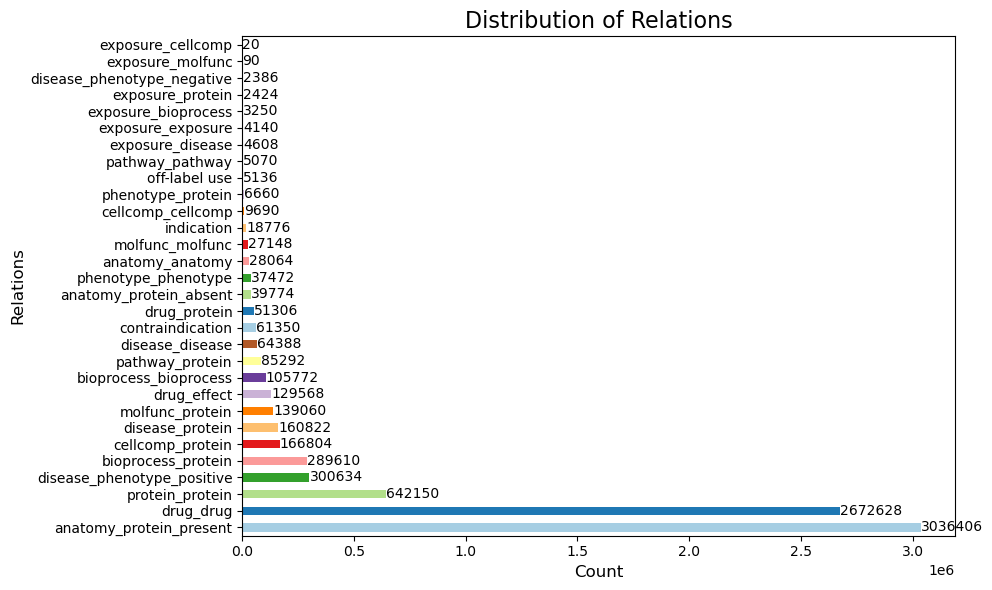

In [14]:
# Plot the horizontal bar chart
plt.figure(figsize=(10, 6))  # Set the figure size
relation_counts.plot.barh(color=plt.cm.Paired.colors)

# Add titles and labels
plt.title("Distribution of Relations", fontsize=16)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Relations", fontsize=12)

# Add data labels to each bar
for index, value in enumerate(relation_counts):
    plt.text(value + 1, index, str(value), va='center', fontsize=10)  # Add labels to the end of each bar

# Show the plot
plt.tight_layout()
plt.show()

# **Question 1.2: How many different types of nodes, and how many of each type are there?**

In [16]:
# Count unique Node-1 types in a specific column (e.g., "x_Type")
node1_counts = data["x_type"].value_counts()

# Print results
print(f"Total distinct node-1 types: {node1_counts.count()}")
print("Counts of each node-1 type:")
print(node1_counts)

Total distinct node-1 types: 10
Counts of each node-1 type:
x_type
drug                  2805696
gene/protein          2631229
anatomy               1566154
disease                341244
effect/phenotype       257096
biological_process     252202
molecular_function      96723
cellular_component      93102
pathway                 47716
exposure                 9336
Name: count, dtype: int64


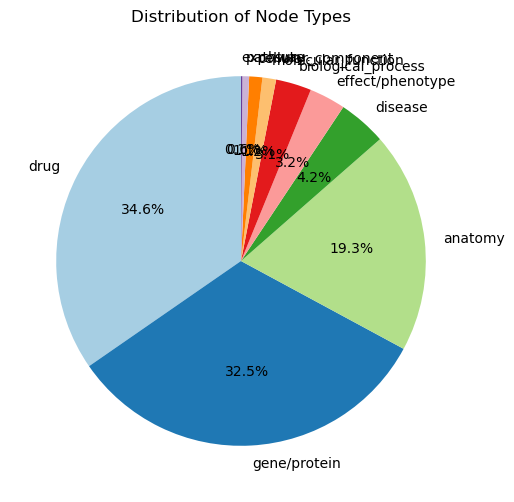

In [17]:
import matplotlib.pyplot as plt

# Plot the pie chart
plt.figure(figsize=(8, 6))  # Set the figure size
node1_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Add a title
plt.title("Distribution of Node Types")

# Display the plot
plt.ylabel("")  # Optional: remove the default y-label
plt.show()

Node counts to visualize in better way through bar chart

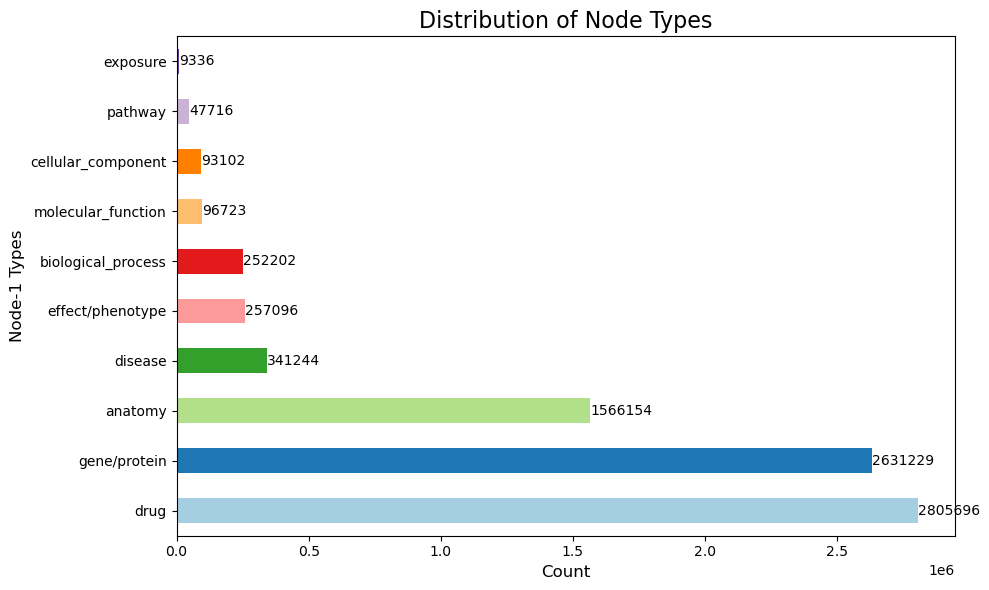

In [19]:
# Plot the horizontal bar chart
plt.figure(figsize=(10, 6))  # Set the figure size
node1_counts.plot.barh(color=plt.cm.Paired.colors)

# Add titles and labels
plt.title("Distribution of Node Types", fontsize=16)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Node-1 Types", fontsize=12)

# Add data labels to each bar
for index, value in enumerate(node1_counts):
    plt.text(value + 1, index, str(value), va='center', fontsize=10)  # Add labels to the end of each bar

# Show the plot
plt.tight_layout()
plt.show()

In [20]:
# Count unique node-2 types in a specific column (e.g., "y-Type")
node2_counts = data["y_type"].value_counts()

# Print results
print(f"Total distinct node-2 types: {node2_counts.count()}")
print("Counts of each node-2 type:")
print(node2_counts)

Total distinct node-2 types: 10
Counts of each node-2 type:
y_type
drug                  2805696
gene/protein          2631229
anatomy               1566154
disease                341244
effect/phenotype       257096
biological_process     252202
molecular_function      96723
cellular_component      93102
pathway                 47716
exposure                 9336
Name: count, dtype: int64


In [21]:
# Combine 'x_type' and 'y_type' to get all node types
node_types = pd.concat([data['x_type'], data['y_type']])

# Count the occurrences of each node type
node_type_counts = node_types.value_counts()

# Print the results
print("Number of different types of nodes:", node_type_counts.nunique())
print("\nCounts for each type of node:")
print(node_type_counts)

Number of different types of nodes: 10

Counts for each type of node:
drug                  5611392
gene/protein          5262458
anatomy               3132308
disease                682488
effect/phenotype       514192
biological_process     504404
molecular_function     193446
cellular_component     186204
pathway                 95432
exposure                18672
Name: count, dtype: int64


### Important : Counting all occurrences of x_type and y_type directly would result in overcounting, as nodes can appear multiple times across different relations. Instead, we should consider unique node IDs (x_index and y_index) to determine the count of unique nodes for each type.

In [23]:
# Extract unique nodes from x_index and y_index with their types
x_nodes = data[['x_index', 'x_type']].drop_duplicates()
y_nodes = data[['y_index', 'y_type']].drop_duplicates()

# Rename columns for consistency
x_nodes.columns = ['node_index', 'node_type']
y_nodes.columns = ['node_index', 'node_type']

# Combine the unique nodes
all_nodes = pd.concat([x_nodes, y_nodes]).drop_duplicates()

# Count the unique nodes for each type
unique_node_type_counts = all_nodes['node_type'].value_counts()

# Print the results
print("Number of different types of nodes:", unique_node_type_counts.nunique())
print("\nCounts for each type of unique node:")
print(unique_node_type_counts)

Number of different types of nodes: 10

Counts for each type of unique node:
node_type
biological_process    28642
gene/protein          27671
disease               17080
effect/phenotype      15311
anatomy               14035
molecular_function    11169
drug                   7957
cellular_component     4176
pathway                2516
exposure                818
Name: count, dtype: int64


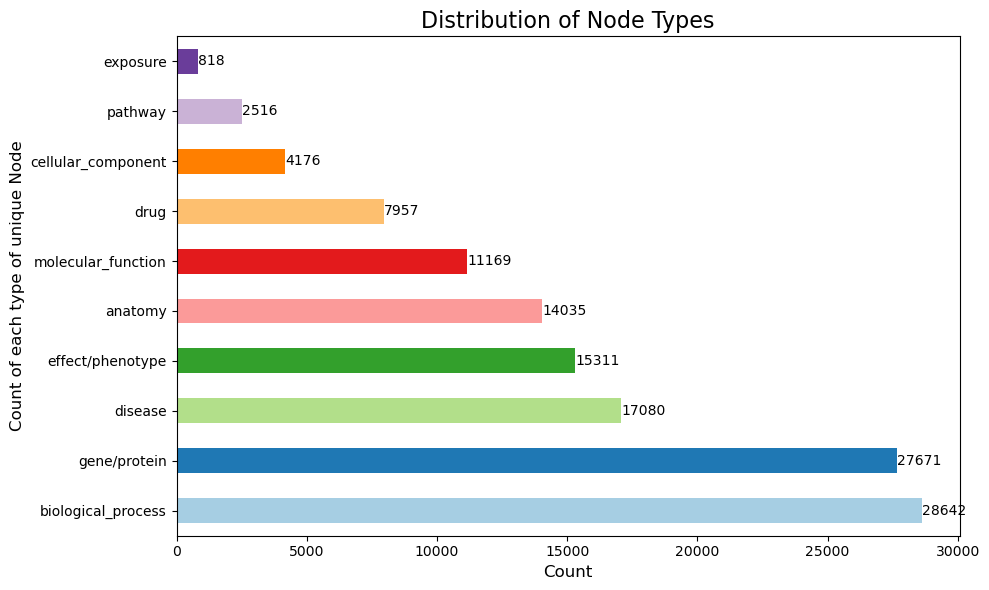

In [24]:
# Plot the horizontal bar chart
plt.figure(figsize=(10, 6))  # Set the figure size
unique_node_type_counts.plot.barh(color=plt.cm.Paired.colors)

# Add titles and labels
plt.title("Distribution of Node Types", fontsize=16)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Count of each type of unique Node", fontsize=12)

# Add data labels to each bar
for index, value in enumerate(unique_node_type_counts):
    plt.text(value + 1, index, str(value), va='center', fontsize=10)  # Add labels to the end of each bar

# Show the plot
plt.tight_layout()
plt.show()

## **Question 1.4:** For each type of node, sort the nodes of that type alphabetically by name, and list the index and name of the first three nodes.

In [26]:
# Define a function to get the first three nodes for each type
def get_sorted_nodes(data, node_type_column, node_name_column, node_index_column):
    results = {}
    unique_types = data[node_type_column].unique()
    for node_type in unique_types:
        filtered_nodes = data[data[node_type_column] == node_type]
        sorted_nodes = filtered_nodes[[node_index_column, node_name_column]].sort_values(by=node_name_column)
        results[node_type] = sorted_nodes.head(3).values.tolist()
    return results

# Get sorted nodes for x_type
x_sorted_nodes = get_sorted_nodes(data, 'x_type', 'x_name', 'x_index')

# Get sorted nodes for y_type
y_sorted_nodes = get_sorted_nodes(data, 'y_type', 'y_name', 'y_index')

# Print the results
print("List of First three nodes for each type in x_type:")
print(x_sorted_nodes)
print("\nList of First three nodes for each type in y_type:")
print(y_sorted_nodes)

List of First three nodes for each type in x_type:
{'gene/protein': [[7097, 'A1BG'], [7097, 'A1BG'], [7097, 'A1BG']], 'drug': [[15992, '(+)-2-(4-biphenyl)propionic acid'], [17614, '(+)-Rutamarin alcohol'], [19012, "(1'R,2'S)-9-(2-Hydroxy-3'-Keto-Cyclopenten-1-yl)Adenine"]], 'effect/phenotype': [[88363, '1-2 finger syndactyly'], [88363, '1-2 finger syndactyly'], [86390, '1-2 toe complete cutaneous syndactyly']], 'disease': [[39879, "'psoriatic arthritis, susceptibility to"], [39879, "'psoriatic arthritis, susceptibility to"], [32869, '10q22.3q23.3 microduplication syndrome']], 'biological_process': [[107968, "'de novo' AMP biosynthetic process"], [107968, "'de novo' AMP biosynthetic process"], [107968, "'de novo' AMP biosynthetic process"]], 'molecular_function': [[115560, '(+)-2-epi-prezizaene synthase activity'], [115686, "(+)-abscisic acid 8'-hydroxylase activity"], [121092, '(+)-abscisic acid D-glucopyranosyl ester transmembrane transporter activity']], 'cellular_component': [[12482

**In above output...duplicate node name are being shown...let's resolve this issue here by dropping duplicate names and consider next one**

In [28]:
# Define a function to get the first three nodes for each type
def get_sorted_nodes(df, node_type_column, node_name_column, node_index_column):
    results = {}
    unique_types = df[node_type_column].unique()
    for node_type in unique_types:
        filtered_nodes = df[df[node_type_column] == node_type]
        # Drop duplicates based on the node name column
        unique_filtered_nodes = filtered_nodes.drop_duplicates(subset=[node_name_column])
        
        # Sort the unique nodes and select the top 3
        sorted_nodes = unique_filtered_nodes[[node_index_column, node_name_column]].sort_values(by=node_name_column)
        results[node_type] = sorted_nodes.head(3).values.tolist()
    return results

# Get sorted nodes for x_type
x_sorted_nodes = get_sorted_nodes(data, 'x_type', 'x_name', 'x_index')

# Get sorted nodes for y_type
y_sorted_nodes = get_sorted_nodes(data, 'y_type', 'y_name', 'y_index')

# Print the results
print("First three nodes for each type in x_type:")
print(x_sorted_nodes)
print("\nFirst three nodes for each type in y_type:")
print(y_sorted_nodes)

First three nodes for each type in x_type:
{'gene/protein': [[7097, 'A1BG'], [83051, 'A1BG-AS1'], [2724, 'A1CF']], 'drug': [[15992, '(+)-2-(4-biphenyl)propionic acid'], [17614, '(+)-Rutamarin alcohol'], [19012, "(1'R,2'S)-9-(2-Hydroxy-3'-Keto-Cyclopenten-1-yl)Adenine"]], 'effect/phenotype': [[88363, '1-2 finger syndactyly'], [86390, '1-2 toe complete cutaneous syndactyly'], [88370, '1-2 toe syndactyly']], 'disease': [[39879, "'psoriatic arthritis, susceptibility to"], [32869, '10q22.3q23.3 microduplication syndrome'], [32497, '11p15.4 microduplication syndrome']], 'biological_process': [[107968, "'de novo' AMP biosynthetic process"], [114817, "'de novo' CTP biosynthetic process"], [110881, "'de novo' GDP-L-fucose biosynthetic process"]], 'molecular_function': [[115560, '(+)-2-epi-prezizaene synthase activity'], [115686, "(+)-abscisic acid 8'-hydroxylase activity"], [121092, '(+)-abscisic acid D-glucopyranosyl ester transmembrane transporter activity']], 'cellular_component': [[124820, 

# **Question 1.5: Produce a table that shows how often each type of node is in each type of relation.**

In [30]:
# Create a table for x_type and relations
x_node_relation_table = data.pivot_table(index='x_type', columns='relation', aggfunc='size', fill_value=0)

# Create a pivot table for y_type and relations
y_node_relation_table = data.pivot_table(index='y_type', columns='relation', aggfunc='size', fill_value=0)

# Print the results
print("Table for x_type and connected relations:")
print(x_node_relation_table)
print("\nTable for y_type and connected relations:")
print(y_node_relation_table)

Table for x_type and relations:
relation            anatomy_anatomy  anatomy_protein_absent  \
x_type                                                        
anatomy                       28064                   19887   
biological_process                0                       0   
cellular_component                0                       0   
disease                           0                       0   
drug                              0                       0   
effect/phenotype                  0                       0   
exposure                          0                       0   
gene/protein                      0                   19887   
molecular_function                0                       0   
pathway                           0                       0   

relation            anatomy_protein_present  bioprocess_bioprocess  \
x_type                                                               
anatomy                             1518203                      0   
b

# **Part 2: Exploring the Knowledge Graph**

# **Question 2.1:Construct and visualise an ontology for the graph that shows the different types of nodes and the relations between them. All nodes and edges should be clearly labelled.**

In [33]:
#!pip install owlready2
from owlready2 import *
import pandas as pd
import types

# Step 1: Initialize ontology
onto = get_ontology("http://www.exampleh.org/kgd.owl")

# Step 2: Extract unique entity types from your DataFrame
EntityTypes = pd.concat([data['x_type'], data['y_type']]).unique()

# Step 3: Define ontology classes dynamically
with onto:
    # Dictionary to store the created classes
    EntityClass = dict.fromkeys(EntityTypes, None)
    
    # Create a new class for each entity type
    for t in EntityTypes:
        EntityClass[t] = types.new_class(t.replace("/", "_"), (Thing,))  # Replace "/" with "_" to avoid syntax issues
        print(f"Created ontology class: {EntityClass[t]}")
    
    print("All ontology classes created successfully!")

Created ontology class: kgd.gene_protein
Created ontology class: kgd.drug
Created ontology class: kgd.effect_phenotype
Created ontology class: kgd.disease
Created ontology class: kgd.biological_process
Created ontology class: kgd.molecular_function
Created ontology class: kgd.cellular_component
Created ontology class: kgd.exposure
Created ontology class: kgd.pathway
Created ontology class: kgd.anatomy
All ontology classes created successfully!


In [34]:
#!pip install --upgrade owlready2

In [35]:
# Step 1: Group the data by relation, x_type (source), and y_type (target)
relation_groups = data.groupby(['relation', 'x_type', 'y_type']).size().reset_index(name='count')
# Step 4: Create relations and assign domain, range, source, and target
RelationClass = {}
RelationDomainRange = {}

# With the grouped data, we now create relations and assign domain/range.
with onto:
    for relation in relation_groups['relation'].unique():
        # Create relation as an ObjectProperty (for example, protein_protein as an object property)
        RelationClass[relation] = types.new_class(relation, (ObjectProperty,))
        
        # Initialize the RelationDomainRange for this relation
        RelationDomainRange[relation] = {
            'Domain': set(),
            'Range': set(),
            'Source': set(),
            'Target': set()
        }
        
        # Find all domains (x_type) and ranges (y_type) for this relation
        relation_data = relation_groups[relation_groups['relation'] == relation]
        domains = relation_data['x_type'].unique()
        ranges = relation_data['y_type'].unique()
        
        # Set the domain and range for the relation
        for domain in domains:
            RelationClass[relation].domain.append(EntityClass[domain])  # Link domain to the corresponding entity class
        
        for range in ranges:
            RelationClass[relation].range.append(EntityClass[range])  # Link range to the corresponding entity class
        
        # Collect source and target types for the relation and update the sets
        sources = relation_data['x_type'].unique()
        targets = relation_data['y_type'].unique()
        RelationDomainRange[relation]['Source'].update([EntityClass[s] for s in sources])
        RelationDomainRange[relation]['Target'].update([EntityClass[t] for t in targets])

        # Print the domain, range, source, and target for the relation
        print(f"Created relation: {relation}")
        print(f"Domain: {RelationDomainRange[relation]['Domain']}")
        print(f"Range: {RelationDomainRange[relation]['Range']}")
        print(f"Source: {RelationDomainRange[relation]['Source']}")
        print(f"Target: {RelationDomainRange[relation]['Target']}")

Created relation: anatomy_anatomy
Domain: set()
Range: set()
Source: {kgd.anatomy}
Target: {kgd.anatomy}
Created relation: anatomy_protein_absent
Domain: set()
Range: set()
Source: {kgd.gene_protein, kgd.anatomy}
Target: {kgd.gene_protein, kgd.anatomy}
Created relation: anatomy_protein_present
Domain: set()
Range: set()
Source: {kgd.gene_protein, kgd.anatomy}
Target: {kgd.gene_protein, kgd.anatomy}
Created relation: bioprocess_bioprocess
Domain: set()
Range: set()
Source: {kgd.biological_process}
Target: {kgd.biological_process}
Created relation: bioprocess_protein
Domain: set()
Range: set()
Source: {kgd.gene_protein, kgd.biological_process}
Target: {kgd.gene_protein, kgd.biological_process}
Created relation: cellcomp_cellcomp
Domain: set()
Range: set()
Source: {kgd.cellular_component}
Target: {kgd.cellular_component}
Created relation: cellcomp_protein
Domain: set()
Range: set()
Source: {kgd.gene_protein, kgd.cellular_component}
Target: {kgd.gene_protein, kgd.cellular_component}
Create

In [36]:
RelationClass

{'anatomy_anatomy': kgd.anatomy_anatomy,
 'anatomy_protein_absent': kgd.anatomy_protein_absent,
 'anatomy_protein_present': kgd.anatomy_protein_present,
 'bioprocess_bioprocess': kgd.bioprocess_bioprocess,
 'bioprocess_protein': kgd.bioprocess_protein,
 'cellcomp_cellcomp': kgd.cellcomp_cellcomp,
 'cellcomp_protein': kgd.cellcomp_protein,
 'contraindication': kgd.contraindication,
 'disease_disease': kgd.disease_disease,
 'disease_phenotype_negative': kgd.disease_phenotype_negative,
 'disease_phenotype_positive': kgd.disease_phenotype_positive,
 'disease_protein': kgd.disease_protein,
 'drug_drug': kgd.drug_drug,
 'drug_effect': kgd.drug_effect,
 'drug_protein': kgd.drug_protein,
 'exposure_bioprocess': kgd.exposure_bioprocess,
 'exposure_cellcomp': kgd.exposure_cellcomp,
 'exposure_disease': kgd.exposure_disease,
 'exposure_exposure': kgd.exposure_exposure,
 'exposure_molfunc': kgd.exposure_molfunc,
 'exposure_protein': kgd.exposure_protein,
 'indication': kgd.indication,
 'molfunc_mo

In [37]:
RelationDomainRange

{'anatomy_anatomy': {'Domain': set(),
  'Range': set(),
  'Source': {kgd.anatomy},
  'Target': {kgd.anatomy}},
 'anatomy_protein_absent': {'Domain': set(),
  'Range': set(),
  'Source': {kgd.anatomy, kgd.gene_protein},
  'Target': {kgd.anatomy, kgd.gene_protein}},
 'anatomy_protein_present': {'Domain': set(),
  'Range': set(),
  'Source': {kgd.anatomy, kgd.gene_protein},
  'Target': {kgd.anatomy, kgd.gene_protein}},
 'bioprocess_bioprocess': {'Domain': set(),
  'Range': set(),
  'Source': {kgd.biological_process},
  'Target': {kgd.biological_process}},
 'bioprocess_protein': {'Domain': set(),
  'Range': set(),
  'Source': {kgd.biological_process, kgd.gene_protein},
  'Target': {kgd.biological_process, kgd.gene_protein}},
 'cellcomp_cellcomp': {'Domain': set(),
  'Range': set(),
  'Source': {kgd.cellular_component},
  'Target': {kgd.cellular_component}},
 'cellcomp_protein': {'Domain': set(),
  'Range': set(),
  'Source': {kgd.cellular_component, kgd.gene_protein},
  'Target': {kgd.cell

In [38]:
# Save the ontology
onto.save(file="kgd_ontology_with_sources_and_targets.owl", format="rdfxml")
print("Ontology saved as kgd_ontology_with_sources_and_targets.owl.")

Ontology saved as kgd_ontology_with_sources_and_targets.owl.


Checking whether this looks sensible against the ones printed out above

In [40]:
print(RelationClass['anatomy_anatomy'].domain)
print(RelationClass['anatomy_anatomy'].range)

[kgd.anatomy]
[kgd.anatomy]


In [41]:
print(RelationClass['anatomy_protein_absent'].domain)
print(RelationClass['anatomy_protein_absent'].range)

[kgd.anatomy, kgd.gene_protein]
[kgd.gene_protein, kgd.anatomy]


# **Visualizing the Ontology**

In [43]:
# Load the ontology (if saved previously)
onto = get_ontology("kgd_ontology_with_sources_and_targets.owl").load()

In [44]:
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add classes as nodes
for cls in onto.classes():
    G.add_node(cls.name)

# Add relationships as edges
for prop in onto.object_properties():
    for domain in prop.domain:
        for range_ in prop.range:
            G.add_edge(domain.name, range_.name, label=prop.name)

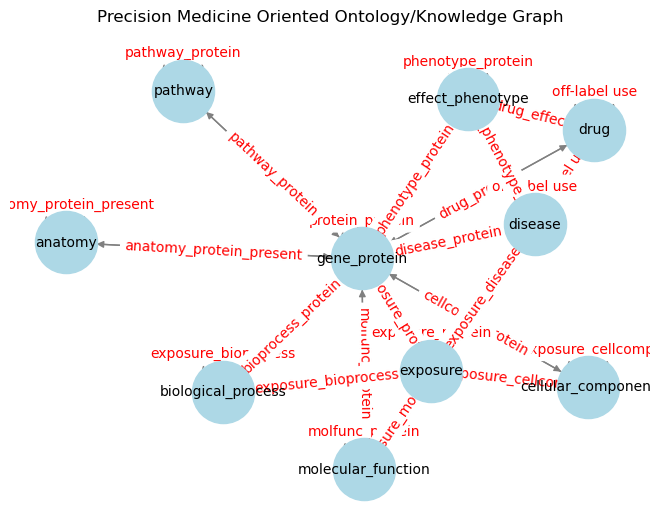

In [45]:
import matplotlib.pyplot as plt

# Creating a layout for the graph
pos = nx.spring_layout(G) 

# Draw the nodes and edges
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=10)

# Add edge labels
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

# Displaying the graph
plt.title("Precision Medicine Oriented Ontology/Knowledge Graph")
plt.show()

# **Above Ontology is little messy and relations are overlapping so let's improve it.**

/var/folders/ml/23lnxp3n2gs0vq78xwywvdm00000gn/T/ipykernel_94538/2045727315.py:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()  # Add padding around the graph


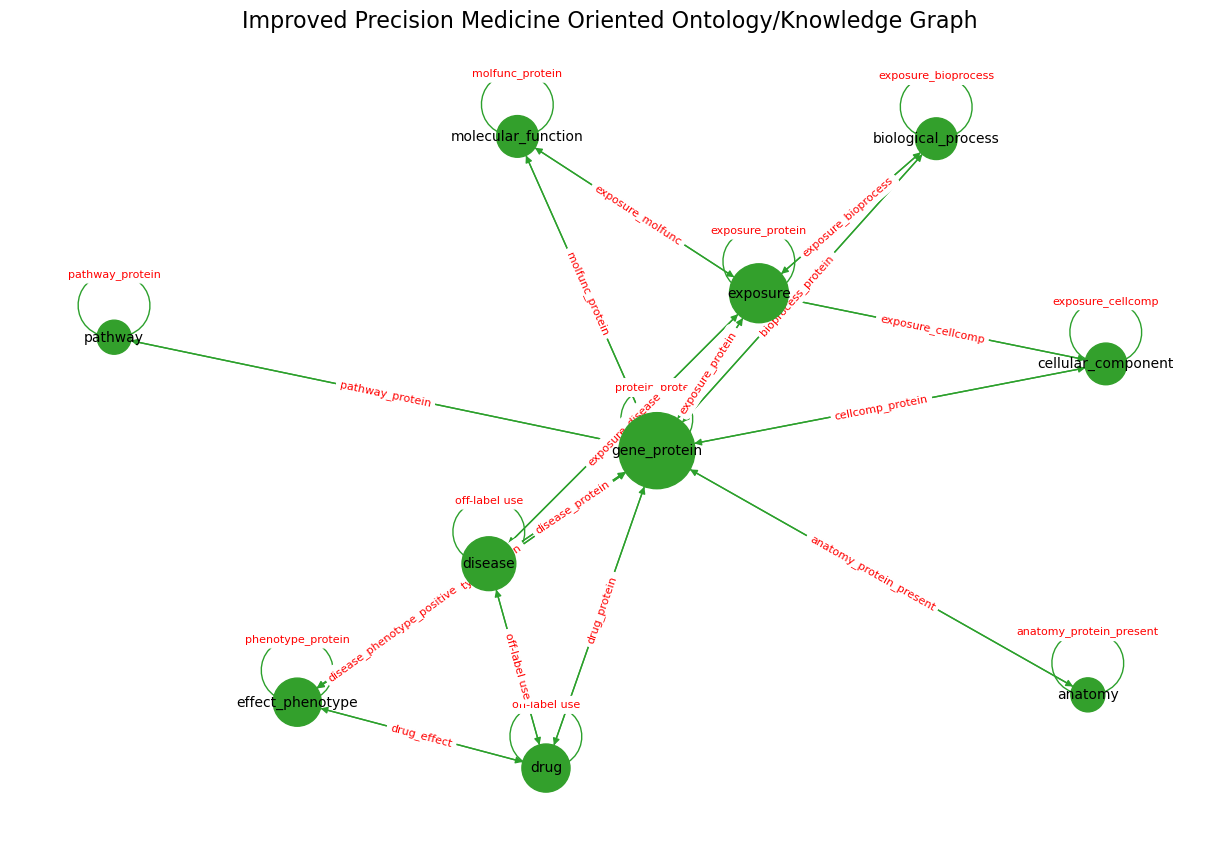

In [47]:
import matplotlib.pyplot as plt
import networkx as nx

# layout for the graph
layout = nx.spring_layout(G, k=0.5, seed=42)  # Adjust k for spacing, seed for consistent layout

# node sizes and colors
node_sizes = [len(list(G.neighbors(node))) * 300 for node in G.nodes()]  # Scale by degree
node_colors = ['#1f78b4' if 'type1' in node else '#33a02c' for node in G.nodes()]  # Example color coding

# edge widths and colors
edge_colors = ['#ff7f0e' if 'relation1' in G[u][v].get('label', '') else '#2ca02c' for u, v in G.edges()]
edge_widths = [2 if 'important' in G[u][v].get('label', '') else 1 for u, v in G.edges()]

# Draw the graph
plt.figure(figsize=(12, 8)) 
nx.draw(
    G,
    layout,
    with_labels=True,
    node_size=node_sizes,
    node_color=node_colors,
    edge_color=edge_colors,
    width=edge_widths,
    font_size=10,
    font_color='black'
)

# Add edge labels
edge_labels = nx.get_edge_attributes(G, 'label')  # Extract edge labels
nx.draw_networkx_edge_labels(
    G,
    layout,
    edge_labels=edge_labels,
    font_color='red',
    font_size=8,
    label_pos=0.5 
)

# Add title and display
plt.title("Improved Precision Medicine Oriented Ontology/Knowledge Graph", fontsize=16)
plt.tight_layout() 
plt.show()

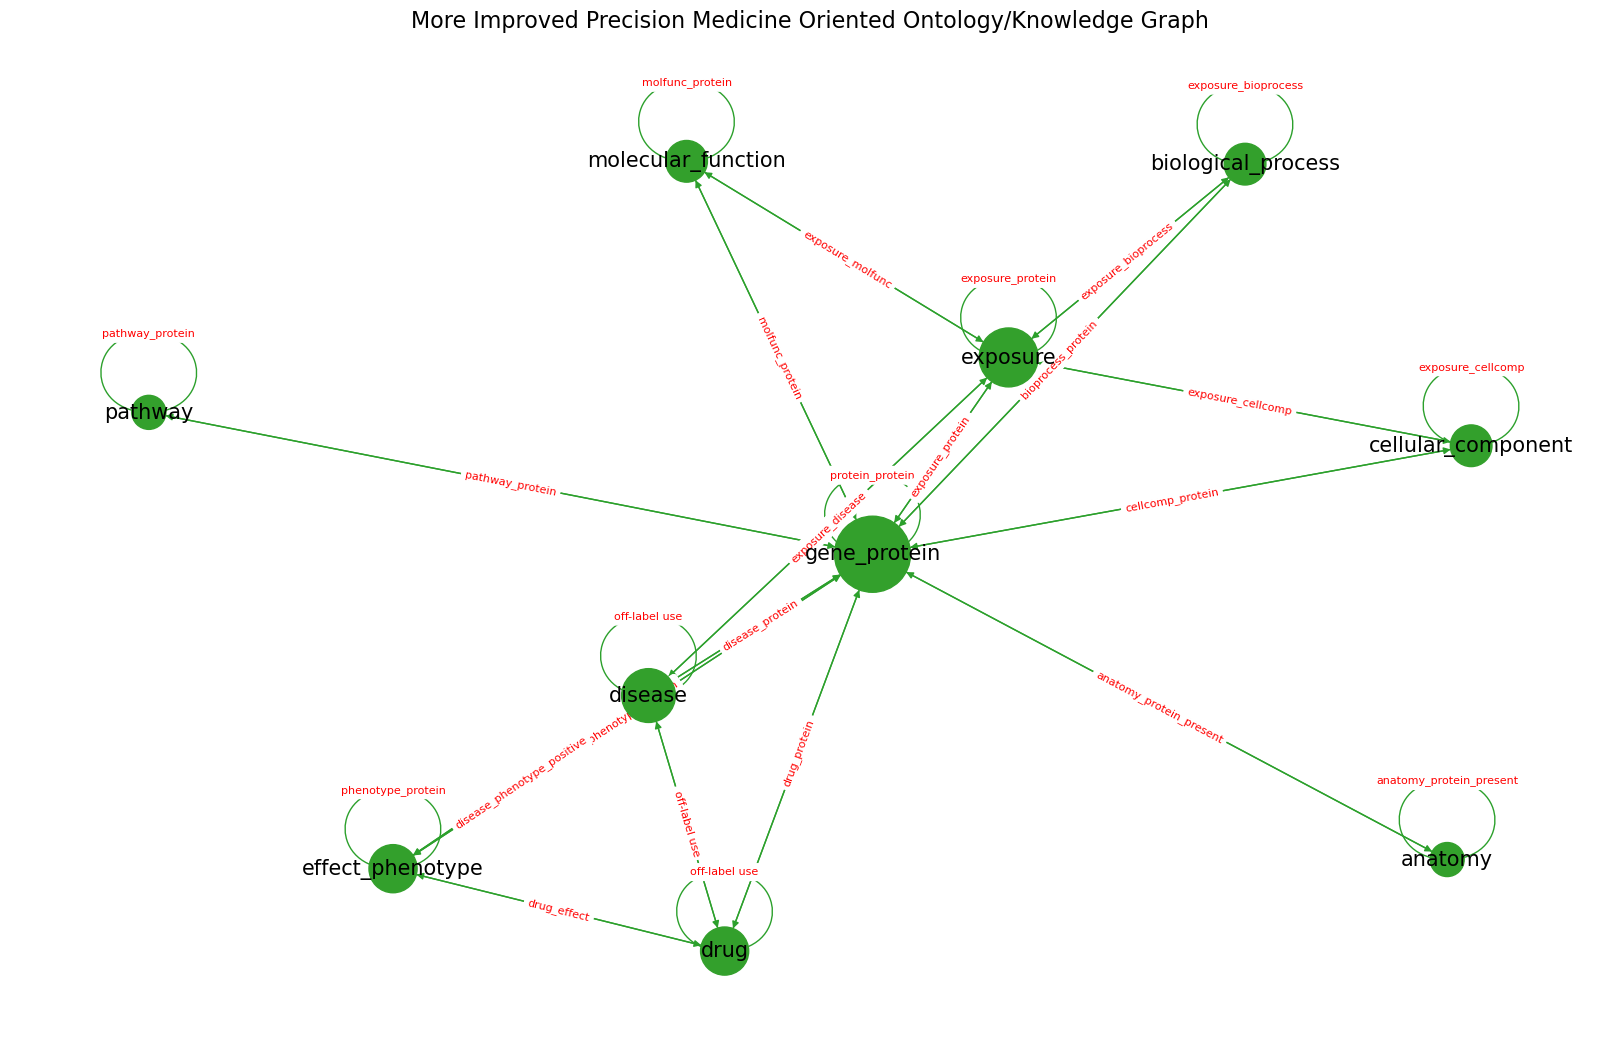

In [48]:
plt.figure(figsize=(16, 10))  # Larger figure
nx.draw(
    G,
    layout,
    with_labels=True,
    node_size=node_sizes,
    node_color=node_colors,
    edge_color=edge_colors,
    width=edge_widths,
    font_size=15,
    font_color='black'
)
nx.draw_networkx_edge_labels(
    G,
    layout,
    edge_labels=edge_labels,
    font_color='red',
    font_size=8,
    label_pos=0.5
)
plt.title("More Improved Precision Medicine Oriented Ontology/Knowledge Graph", fontsize=16)
plt.show()

# **Populating the Graph**
# **Question 2.2: Using the example from the lectures as a template, construct the knowledge graph using the data in kg.csv.**

In [50]:
from tqdm import tqdm
#tqdm is used to see the progress of execution.
# class structure
class ThingClass:
    def __init__(self, name):
        self.name = name
        self.rel = []  

# Create specific subclasses if needed
class BiologicalProcessClass(ThingClass): #Bilogical Process and Chemical Class was creating problem while populating graph thats y defined seperately.
    pass

class ChemicalClass(ThingClass):
    pass

# Modify the NodeEntityClass dictionary to ensure consistent initialization
NodeEntityClass = {
    'biological_process': BiologicalProcessClass,
    'chemical': ChemicalClass,
    
}

# the graph population
TheGraph = {}

print("Populating the graph with entities...")
for _, row in tqdm(data.iterrows(), total=len(data), desc="Adding entities"):
    # Extract node details
    x_index = row['x_index']
    x_type = row['x_type']
    x_name = row['x_name']
    
    y_index = row['y_index']
    y_type = row['y_type']
    y_name = row['y_name']
    
    # Ensuring consistent class creation
    def create_or_get_node(index, node_type, name):
        if index not in TheGraph:
            TheGraph[index] = NodeEntityClass.get(node_type, ThingClass)(name=name)
        return TheGraph[index]
         # Create or get source and target nodes
    source_entity = create_or_get_node(x_index, x_type, x_name)
    target_entity = create_or_get_node(y_index, y_type, y_name)

# Debugging: checking size of the graph
print(f"Total entities added to the graph: {len(TheGraph)}")

# Adding edges
print("Adding edges to the graph...")
for _, row in tqdm(data.iterrows(), total=len(data), desc="Adding edges"):
    source_index = row['x_index']
    target_index = row['y_index']
    relation = row['relation']
    
    # Ensure entities exist and the relation is defined
    if source_index in TheGraph and target_index in TheGraph:
        source_entity = TheGraph[source_index]
        target_entity = TheGraph[target_index]
        
        # Dynamically add relation if it doesn't exist in the source entity
        if relation not in source_entity.__dict__:
            setattr(source_entity, relation, [])
        
        # Add the target node to the relationship of the source node
        getattr(source_entity, relation).append(target_entity)

Populating the graph with entities...


Adding entities: 100%|█████████████| 8100498/8100498 [01:39<00:00, 81466.65it/s]


Total entities added to the graph: 129375
Adding edges to the graph...


Adding edges: 100%|████████████████| 8100498/8100498 [01:26<00:00, 93350.96it/s]


# **Checking Knowledge Graph Populated Well**

In [52]:
def inspect_graph(graph):
    """Comprehensive graph inspection"""
    print("Graph Report:")
    print("-" * 30)
    
    # Count nodes
    print(f"Total Nodes: {len(graph)}")
    
    # Inspecting a few nodes in detail
    for index, node in list(graph.items())[:5]:  # First 5 nodes
        print(f"\nNode Index: {index}")
        print(f"Node Name: {node.name}")
        
        # Print all relations
        for attr in dir(node):
            if not attr.startswith('__') and attr != 'name':
                relations = getattr(node, attr)
                if isinstance(relations, list):
                    print(f"  {attr} Relations:")
                    for rel in relations:
                        print(f"    - {rel.name}")

# Call the inspection function
inspect_graph(TheGraph)

Graph Inspection Report:
------------------------------
Total Nodes: 129375

Node Index: 0
Node Name: PHYHIP
  anatomy_protein_absent Relations:
    - quadriceps femoris
    - vastus lateralis
    - deltoid
    - thymus
    - nasal cavity epithelium
  anatomy_protein_present Relations:
    - uterine cervix
    - pituitary gland
    - zone of skin
    - lymph node
    - tendon
    - renal glomerulus
    - adult mammalian kidney
    - intestine
    - prefrontal cortex
    - material anatomical entity
    - anatomical system
    - multi-cellular organism
    - testis
    - female reproductive system
    - heart
    - brain
    - cerebral cortex
    - female gonad
    - uterus
    - vagina
    - mammalian vulva
    - adipose tissue
    - central nervous system
    - esophagus
    - saliva-secreting gland
    - skeletal muscle tissue
    - colon
    - cortex of kidney
    - adrenal cortex
    - urinary bladder
    - pancreas
    - endometrium
    - myometrium
    - tibial nerve
    - muscle

**Checking Statistics of relations**

In [54]:
def comprehensive_graph_analysis(graph):
   
    print("Graph Analysis")
    print("=" * 30)
    
    # Basic stats
    print(f"Total Nodes: {len(graph)}")
    
    # Node type distribution
    node_types = {}
    for node in graph.values():
        node_type = type(node).__name__
        node_types[node_type] = node_types.get(node_type, 0) + 1
    
    print("\nNode Type Distribution:")
    for node_type, count in node_types.items():
        print(f"{node_type}: {count}")
    
    # Relation analysis
    relation_stats = {}
    for node in graph.values():
        for attr in dir(node):
            if not attr.startswith('__') and attr != 'name':
                relations = getattr(node, attr)
                if isinstance(relations, list):
                    if relations:
                        relation_stats[attr] = relation_stats.get(attr, 0) + len(relations)
    
    print("\nRelation Info")
    for rel_type, count in relation_stats.items():
        print(f"{rel_type}: {count} connections")


comprehensive_graph_analysis(TheGraph)

Comprehensive Graph Analysis
Total Nodes: 129375

Node Type Distribution:
ThingClass: 100733
BiologicalProcessClass: 28642

Relation Statistics:
anatomy_protein_absent: 39774 connections
anatomy_protein_present: 3036406 connections
bioprocess_protein: 289610 connections
cellcomp_protein: 166804 connections
molfunc_protein: 139060 connections
protein_protein: 642150 connections
disease_protein: 160822 connections
pathway_protein: 85292 connections
drug_protein: 51306 connections
exposure_protein: 2424 connections
phenotype_protein: 6660 connections
drug_drug: 2672628 connections
contraindication: 61350 connections
drug_effect: 129568 connections
indication: 18776 connections
off-label use: 5136 connections
disease_disease: 64388 connections
disease_phenotype_positive: 300634 connections
exposure_disease: 4608 connections
disease_phenotype_negative: 2386 connections
phenotype_phenotype: 37472 connections
bioprocess_bioprocess: 105772 connections
exposure_bioprocess: 3250 connections
molf

# **Question 2.3: Select two nodes in the graph that correspond to diseases. The nodes should not be directly connected, but should be separated by no more than three relations/edges.** 
**Important: Follwing sub graph needs improvement....So I tried it in next few steps**

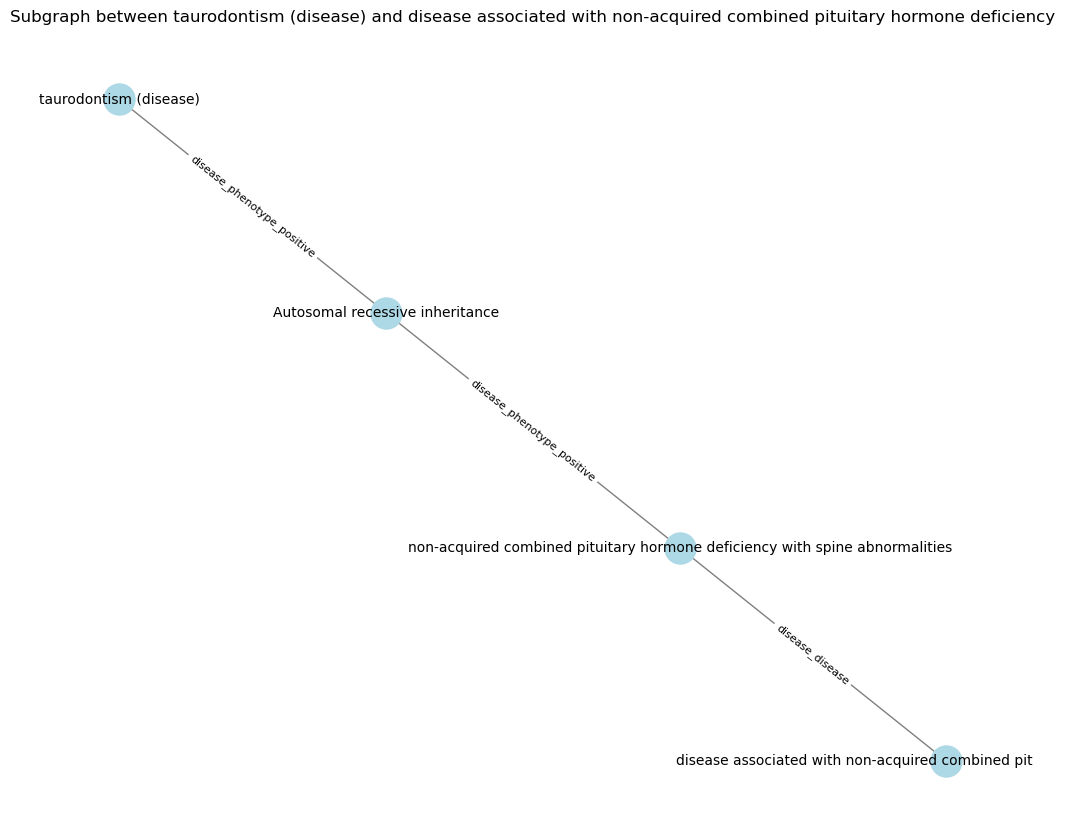

In [56]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Assuming your dataset is in a DataFrame called 'data'
# Filter the data to include only disease-related edges
disease_edges = data[(data['x_type'] == 'disease') | (data['y_type'] == 'disease')]

# Create a graph
G = nx.Graph()

# Add edges to the graph
for _, row in disease_edges.iterrows():
    G.add_edge(row['x_name'], row['y_name'], relation=row['relation'])

# Define the specific diseases to analyze
disease_x = "taurodontism (disease)"
disease_y = "disease associated with non-acquired combined pituitary hormone deficiency"

# Check if the nodes exist in the graph
if disease_x in G and disease_y in G:
    try:
        # Extract the subgraph of all connections between the diseases
        subgraph_nodes = nx.shortest_path(G, source=disease_x, target=disease_y)
        subgraph = G.subgraph(subgraph_nodes)

        # Visualize the subgraph
        plt.figure(figsize=(10, 8))
        pos = nx.spring_layout(subgraph)  # Layout for better visualization
        nx.draw(subgraph, pos, with_labels=True, node_color='lightblue', edge_color='gray', font_size=10, node_size=500)
        labels = nx.get_edge_attributes(subgraph, 'relation')
        nx.draw_networkx_edge_labels(subgraph, pos, edge_labels=labels, font_size=8)
        plt.title(f"Subgraph between {disease_x} and {disease_y}")
        plt.show()
    except nx.NetworkXNoPath:
        print(f"No path exists between {disease_x} and {disease_y}.")
else:
    print(f"One or both diseases ({disease_x}, {disease_y}) do not exist in the graph.")


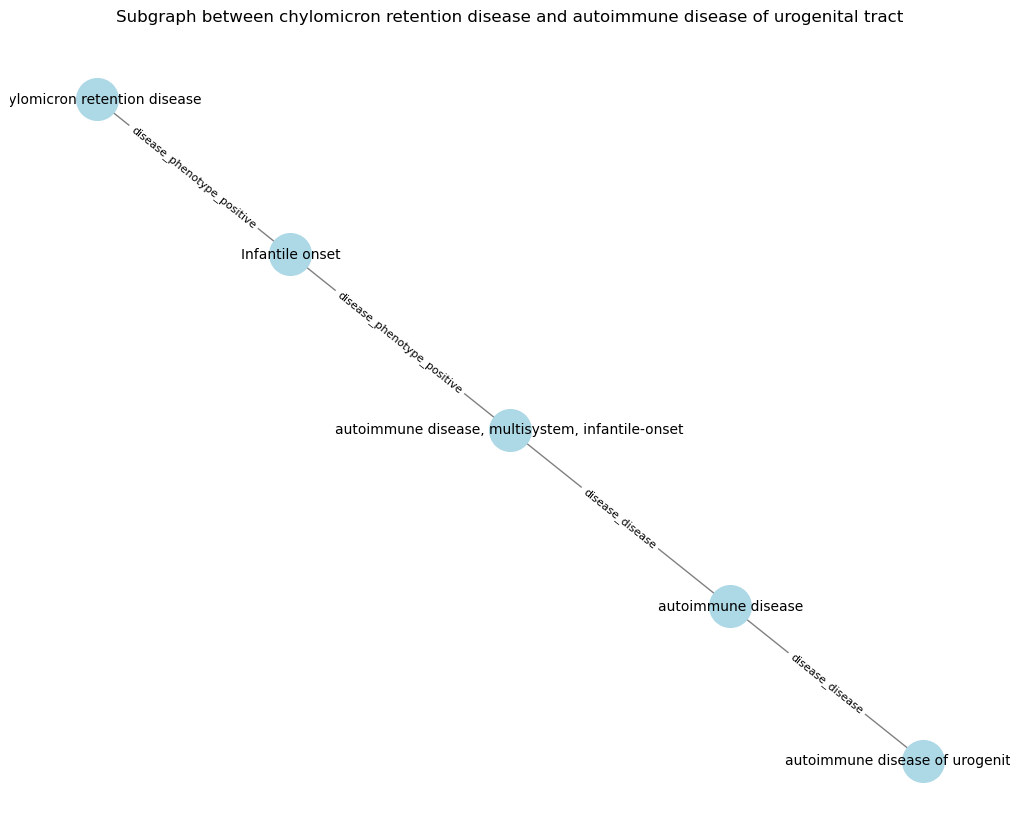

In [57]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Assuming your dataset is in a DataFrame called 'data'
# Filter the data to include only disease-related edges
disease_edges = data[(data['x_type'] == 'disease') | (data['y_type'] == 'disease')]

# Create a graph
G = nx.Graph()

# Adding edges to the graph
for _, row in disease_edges.iterrows():
    G.add_edge(row['x_name'], row['y_name'], relation=row['relation'])

# Define the specific diseases to analyze
disease_x = "chylomicron retention disease"
disease_y = "autoimmune disease of urogenital tract"

# Checking if the nodes exist in the graph
if disease_x in G and disease_y in G:
    try:
        # Extract the subgraph of all connections between the diseases
        subgraph_nodes = nx.shortest_path(G, source=disease_x, target=disease_y)
        subgraph = G.subgraph(subgraph_nodes)

        # Visualize the subgraph
        plt.figure(figsize=(10, 8))
        pos = nx.spring_layout(subgraph)  # Layout for better visualization
        nx.draw(subgraph, pos, with_labels=True, node_color='lightblue', edge_color='gray', font_size=10, node_size=900)
        labels = nx.get_edge_attributes(subgraph, 'relation')
        nx.draw_networkx_edge_labels(subgraph, pos, edge_labels=labels, font_size=8)
        plt.title(f"Subgraph between {disease_x} and {disease_y}")
        plt.show()
    except nx.NetworkXNoPath:
        print(f"No path exists between {disease_x} and {disease_y}.")
else:
    print(f"One or both diseases ({disease_x}, {disease_y}) do not exist in the graph.")

# **Question 2.3(a): Select two nodes in the graph that correspond to diseases. The nodes should not be directly connected, but should be separated by no more than three relations/edges.** 

**Important: Here i have tried to find first 20 pairs of diseases which are not directly connected** 
**to choose any one pair from them because in random, it was changing the pair after every execution**

In [60]:
import pandas as pd
import networkx as nx
import random

# Filtering the data to include only disease-related edges
disease_edges = data[(data['x_type'] == 'disease') | (data['y_type'] == 'disease')]

# Create a graph
G = nx.Graph()

# Adding edges to the graph
for _, row in disease_edges.iterrows():
    G.add_edge(row['x_name'], row['y_name'], relation=row['relation'])

# Identifying all nodes that correspond to diseases
disease_nodes = set()

# Iterate over the edges and collect disease nodes
for _, row in disease_edges.iterrows():
    if 'disease' in row['x_type']:
        disease_nodes.add(row['x_name'])
    if 'disease' in row['y_type']:
        disease_nodes.add(row['y_name'])

# Initialize an empty list to store pairs of disease nodes that are not directly connected
valid_disease_pairs = []

# Use a breadth-first search (BFS) strategy for efficiency
all_valid_pairs = set()
for disease in disease_nodes:
    # Get neighbors up to depth 3
    neighbors = nx.single_source_shortest_path_length(G, source=disease, cutoff=3)
    for neighbor, distance in neighbors.items():
        if neighbor in disease_nodes and distance > 1:  # Ensure the neighbor is a disease and not directly connected
            pair = tuple(sorted((disease, neighbor)))  # Sorting to avoid duplicates (A, B) and (B, A)
            all_valid_pairs.add(pair)

# Convert set to list for reproducibility
all_valid_pairs = list(all_valid_pairs)

# Set random seed for reproducibility
random.seed(42)

# Select exactly 20 pairs deterministically
valid_disease_pairs = random.sample(all_valid_pairs, min(20, len(all_valid_pairs)))

# Output the list of valid disease pairs
if valid_disease_pairs:
    print("First 20 disease pairs that are not directly connected but separated by no more than 3 relations:")
    for pair in valid_disease_pairs:
        print(pair)
else:
    print("No such disease pairs found.")


First 20 disease pairs that are not directly connected but separated by no more than 3 relations:
('hypoprebetalipoproteinemia, acanthocytosis, retinitis pigmentosa, and pallidal degeneration', 'triosephosphate isomerase deficiency')
('capillary malformation', 'platelet aggregation, spontaneous')
('developmental defect of the eye', 'male infertility due to large-headed multiflagellar polyploid spermatozoa')
('adult cerebellar neoplasm', 'glioma')
('Kniest dysplasia', 'paternal 14q32.2 hypomethylation syndrome')
('ichthyosis-cheek-eyebrow syndrome', 'non-syndromic intellectual disability')
('KID syndrome', 'Sillence syndrome')
('GCGR-related hyperglucagonemia', 'isolated focal cortical dysplasia')
('Klippel-Feil syndrome', 'aorta coarctation')
('dry eye syndrome', 'oculodentodigital dysplasia')
('erythromelalgia', 'myoclonic epilepsy, Hartung type')
('breast ductal adenocarcinoma', 'focal dystonia')
('15q11q13 microduplication syndrome', 'macroglobulinemia, Waldenstrom')
('nephrolithias

In [61]:
del range # range was creating problem...to clear it
for i in range(5):
    print(i)

0
1
2
3
4


# **Question 2.3(b): Extract the subgraph containing all paths between the two nodes that traverse up to six edges. Visualise the graph. You may find it helpful to select a starting node with a small number of outgoing relations. For visualisation purposes, you may limit your visualisation to show only 100 paths.
**Now plotting Subgraph of two slected nodes of disease i.e "Hennekam syndrome" and "ureterocele (disease)" upto 6 edges and 100 paths**

['Hennekam syndrome', 'genetic nervous system disorder', 'Mendelian disease', 'ureterocele (disease)']


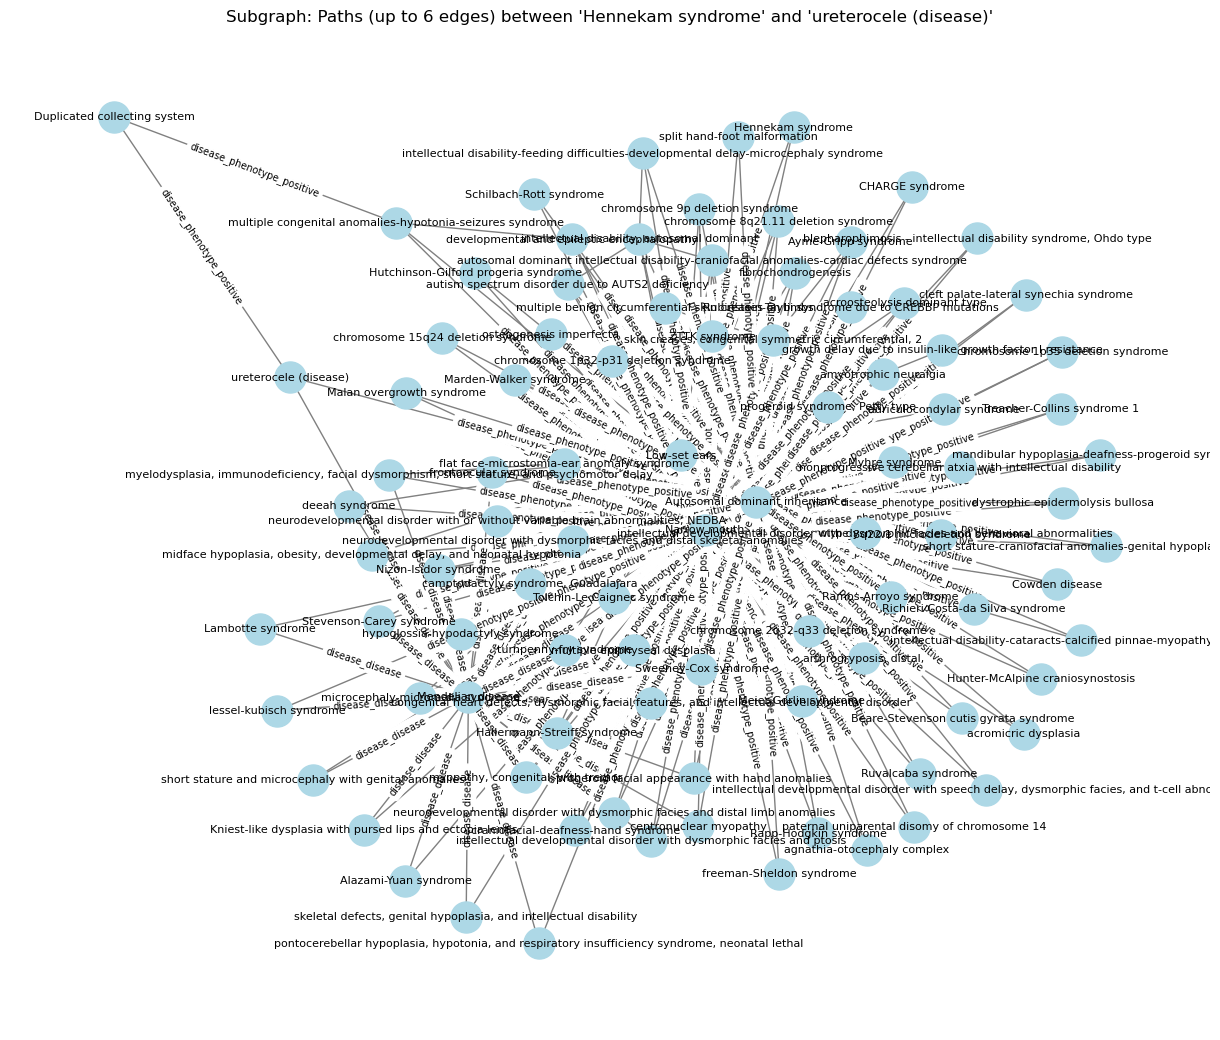

Total paths visualized: 100


In [63]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the disease nodes
disease_x = "Hennekam syndrome"
disease_y = "ureterocele (disease)"

# Ensure the graph exists and the nodes are valid
if disease_x not in G or disease_y not in G:
    print(f"One or both of the nodes ({disease_x}, {disease_y}) do not exist in the graph.")
else:
    try:
        # Initialize variables
        paths_found = 0
        max_paths = 100
        nodes_in_paths = set()
        edges_in_paths = set()

        # Use a generator to find paths and process them one at a time
        for path in nx.all_simple_paths(G, source=disease_x, target=disease_y, cutoff=6):
            # Add nodes and edges from the current path
            nodes_in_paths.update(path)
            edges_in_paths.update((path[i], path[i + 1]) for i in range(len(path) - 1))

            # Increment the path count
            paths_found += 1

            # Stop after finding the first 100 paths
            if paths_found >= max_paths:
                break
        shortest=nx.shortest_path(G, source=disease_x, target=disease_y)
        print(shortest)
        # Create the subgraph from the collected/chosen nodes and edges
        subgraph = G.subgraph(nodes_in_paths)

        # Visualize the subgraph
        plt.figure(figsize=(12, 10))
        pos = nx.spring_layout(subgraph)  # Layout for better visualization
        nx.draw(
            subgraph, pos, with_labels=True, node_color='lightblue', edge_color='gray',
            font_size=8, node_size=500
        )
        # Add edge labels for relations
        edge_labels = {(u, v): G[u][v].get('relation', '') for u, v in edges_in_paths}
        nx.draw_networkx_edge_labels(subgraph, pos, edge_labels=edge_labels, font_size=7)

        plt.title(f"Subgraph: Paths (up to 6 edges) between '{disease_x}' and '{disease_y}'")
        plt.show()

        print(f"Total paths visualized: {paths_found}")
    except nx.NetworkXNoPath:
        print(f"No path exists between '{disease_x}' and '{disease_y}' within 6 edges.")


In [64]:
!pip install d3graph

In [65]:
type(subgraph)

networkx.classes.graph.Graph

# **D3Graph Code is here....It will create html...**

In [67]:
from d3graph import d3graph
adjmtrx=nx.to_pandas_adjacency(subgraph)

# Initialize d3graph
d3 = d3graph()

# Load adjacency matrix
d3.graph(adjmtrx)
d3.set_edge_properties(edge_distance=1000)
edge_labels = nx.get_edge_attributes(subgraph, 'label')
d3.show(filepath="Documents/graph.html")

[d3graph] INFO> Set directed=True to see the markers!
[d3graph] INFO> Keep only edges with weight>0
[d3graph] INFO> Converting source-target into adjacency matrix..
[d3graph] INFO> Making the matrix symmetric..
[d3graph] INFO> Converting adjacency matrix into source-target..
[d3graph] INFO> Number of unique nodes: 93
[d3graph] INFO> Set directed=True to see the markers!
[d3graph] INFO> Keep only edges with weight>0
[d3graph] INFO> Converting source-target into adjacency matrix..
[d3graph] INFO> Making the matrix symmetric..
[d3graph] INFO> Slider range is set to [0, 1]
[d3graph] INFO> Write to path: [/Users/hinaghazanfar/Documents/graph.html]
[d3graph] INFO> File already exists and will be overwritten: [/Users/hinaghazanfar/Documents/graph.html]


# **Part 3: Deriving a Knowledge Base and Inferring New Relations**

# **Question 3.1 :Convert the subgraph extracted in part 2.3 into a rule based system such that each directed relation in the graph from a node 𝑥 to a node 𝑦 is represented as a rule if the node is x then the node is connected to y. You do not need to list the rules explicitly in the report.**

In [70]:
import networkx as nx



# Generating rules from the graph
rules = []
for u, v in subgraph.edges:
    # Add the bi-directional rules for each edge
    rules.append(f"If node is {u}, then the node is connected to {v}")
    rules.append(f"If node is {v}, then the node is connected to {u}")

# Display the generated rules
for rule in rules:
    print(rule)

If node is Ramos-Arroyo syndrome, then the node is connected to Autosomal dominant inheritance
If node is Autosomal dominant inheritance, then the node is connected to Ramos-Arroyo syndrome
If node is Ramos-Arroyo syndrome, then the node is connected to Low-set ears
If node is Low-set ears, then the node is connected to Ramos-Arroyo syndrome
If node is Ramos-Arroyo syndrome, then the node is connected to Narrow mouth
If node is Narrow mouth, then the node is connected to Ramos-Arroyo syndrome
If node is deeah syndrome, then the node is connected to Narrow mouth
If node is Narrow mouth, then the node is connected to deeah syndrome
If node is deeah syndrome, then the node is connected to Low-set ears
If node is Low-set ears, then the node is connected to deeah syndrome
If node is deeah syndrome, then the node is connected to Mendelian disease
If node is Mendelian disease, then the node is connected to deeah syndrome
If node is chromosome 15q24 deletion syndrome, then the node is connecte

# **Question 3.2: Use forward chaining and breadth first search to infer new relations that are not explictly present in the subgraph. Select three of these relations and for each one, map out the chain of reasoning that enables the inference to be made.**

In [72]:
import networkx as nx

# Function to perform forward chaining with Breadth First Search

G=subgraph
def infer_relations(graph):
    inferred_relations = set()  # Store inferred relationships

    # For each node, perform BFS to find indirect connections
    for start_node in graph.nodes:
        visited = set()  # Track visited nodes
        queue = [start_node]
        
        while queue:
            current = queue.pop(0)
            if current not in visited:
                visited.add(current)

                # Infer relations for each neighbor
                for neighbor in graph.neighbors(current):
                    inferred_relations.add((start_node, neighbor))
                    queue.append(neighbor)

    return inferred_relations

# Get inferred relations
explicit_relations = set(G.edges())
inferred_relations = infer_relations(G)
new_relations = inferred_relations - explicit_relations

# Display three new relations with chains of reasoning
examples = list(new_relations)[:3]
for relation in examples:
    start, end = relation

    # Map out the chain of reasoning using shortest path in G
    path = nx.shortest_path(G, source=start, target=end)
    reasoning_chain = " -> ".join(map(str, path))
    print(f"New Relation: If node is {start}, then the node is connected to {end}")
    print(f"Reasoning Chain: {reasoning_chain}")
    print()

New Relation: If node is chromosome 15q24 deletion syndrome, then the node is connected to skin creases, congenital symmetric circumferential, 2
Reasoning Chain: chromosome 15q24 deletion syndrome -> Narrow mouth -> skin creases, congenital symmetric circumferential, 2

New Relation: If node is split hand-foot malformation, then the node is connected to arthrogryposis, distal,
Reasoning Chain: split hand-foot malformation -> Narrow mouth -> arthrogryposis, distal,

New Relation: If node is Myhre syndrome, then the node is connected to ZTTK syndrome
Reasoning Chain: Myhre syndrome -> Narrow mouth -> ZTTK syndrome



# **Part 4: A Bayesian View of the Data**
**1.Design a Bayesian network to model the joint distribution of anatomical region, protein, disease, and drug. Your network should use conditional distributions that can be derived directly from the data (you do not need to compute the distributions). If you need to make any assumptions, please state these clearly.**

In [74]:
# Filter for specific x_type and y_type values
filtered_counts = data[
    (data['x_type'].isin(['disease', 'gene/protein', 'anatomy', 'drug'])) &
    (data['y_type'].isin(['disease', 'gene/protein', 'anatomy', 'drug']))
].value_counts(['x_type', 'y_type', 'relation'])

# Reset index for easier handling
filtered_counts_df = filtered_counts.reset_index(name='count')

# Find the max count for each relation along with x_type and y_type
max_counts_per_relation = (
    filtered_counts_df.loc[filtered_counts_df.groupby('relation')['count'].idxmax()]
)

# Display the x_type, y_type, relation, and their maximum counts
filtered_counts_2=(max_counts_per_relation[['relation', 'x_type', 'y_type', 'count']])
filtered_counts_2

,relation,x_type,y_type,count
9,anatomy_anatomy,anatomy,anatomy,28064
12,anatomy_protein_absent,anatomy,gene/protein,19887
1,anatomy_protein_present,anatomy,gene/protein,1518203
7,contraindication,disease,drug,30675
6,disease_disease,disease,disease,64388
4,disease_protein,gene/protein,disease,80411
0,drug_drug,drug,drug,2672628
10,drug_protein,drug,gene/protein,25653
14,indication,disease,drug,9388
16,off-label use,drug,disease,2568


In [75]:
import pandas as pd


data = filtered_counts_df

# Total count of all relationships
total_count = data['count'].sum()

# Prior Probability for each x_type
prior_probabilities = data.groupby('x_type')['count'].sum() / total_count
print("Prior Probabilities:")
print(prior_probabilities)

# Conditional Probability of relation given x_type
conditional_probabilities = data.groupby(['x_type', 'relation'])['count'].sum() / data.groupby('x_type')['count'].sum()
print("\nConditional Probabilities (relation | x_type):")
print(conditional_probabilities)

# Joint Probability of x_type and y_type
joint_probabilities = data.groupby(['x_type', 'y_type'])['count'].sum() / total_count
print("\nJoint Probabilities (x_type, y_type):")
print(joint_probabilities)

Prior Probabilities:
x_type
anatomy         0.230969
disease         0.027641
drug            0.404217
gene/protein    0.337173
Name: count, dtype: float64

Conditional Probabilities (relation | x_type):
x_type        relation               
anatomy       anatomy_anatomy            0.017919
              anatomy_protein_absent     0.012698
              anatomy_protein_present    0.969383
disease       contraindication           0.163661
              disease_disease            0.343531
              disease_protein            0.429019
              indication                 0.050088
              off-label use              0.013701
drug          contraindication           0.011192
              drug_drug                  0.975087
              drug_protein               0.009359
              indication                 0.003425
              off-label use              0.000937
gene/protein  anatomy_protein_absent     0.008698
              anatomy_protein_present    0.664042
        

In [76]:
!pip install pymc

**with assumed probabilities**

Output()

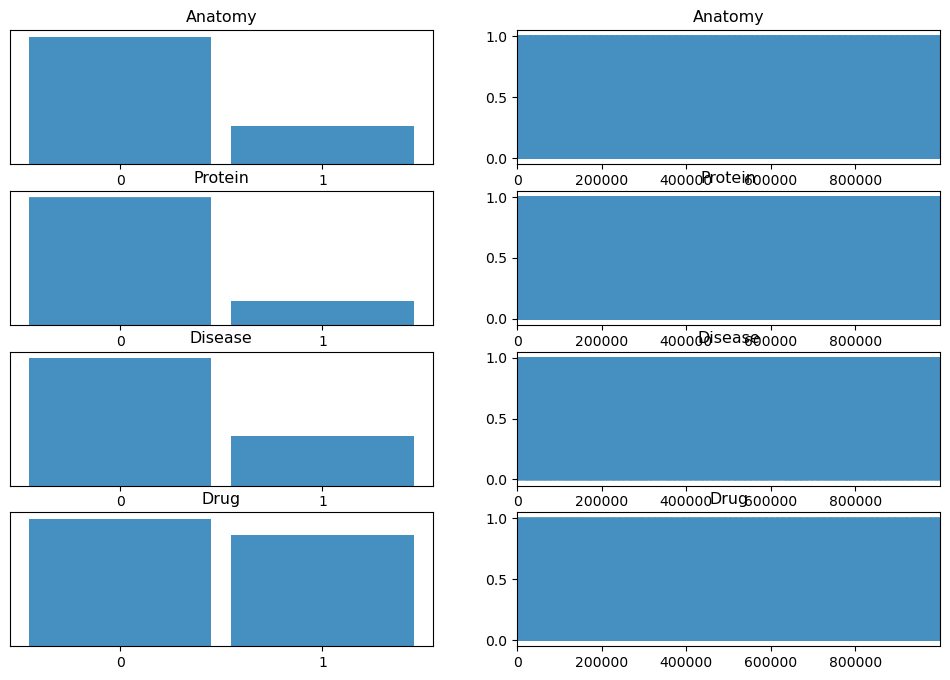

In [78]:
import pymc as mc
import numpy as np

# Example conditional probabilities (replace with real data if available)
P_anatomy = 0.23  # Probability of Anatomy being 1 (e.g., heart)
P_protein_given_anatomy = [ 0.66, 0.008]  # P(Protein=1 | Anatomy=1) and P(Protein=1 | Anatomy=0)
P_disease_given_protein = [0.7, 0.2]  # P(Disease=1 | Protein=1) and P(Disease=1 | Protein=0)
P_drug_given_disease = [0.9, 0.3]  # P(Drug=1 | Disease=1) and P(Drug=1 | Disease=0)

# Create the Bayesian Network model
with mc.Model() as model:
    # Anatomy (root variable)
    anatomy = mc.Bernoulli("Anatomy", p=P_anatomy)

    # Protein conditional on Anatomy
    protein = mc.Bernoulli("Protein", p=mc.math.switch(anatomy, P_protein_given_anatomy[0], P_protein_given_anatomy[1]))

    # Disease conditional on Protein
    disease = mc.Bernoulli("Disease", p=mc.math.switch(protein, P_disease_given_protein[0], P_disease_given_protein[1]))

    # Drug conditional on Disease
    drug = mc.Bernoulli("Drug", p=mc.math.switch(disease, P_drug_given_disease[0], P_drug_given_disease[1]))
    # Perform sampling (Monte Carlo sampling)
    trace = mc.sample(1000, tune=500, chains=4, random_seed=123)

# Summarize the results
mc.summary(trace, hdi_prob=0.95)
# Visualize the trace
mc.plot_trace(trace)
plt.show()

In [ ]:
!pip install pgmpy

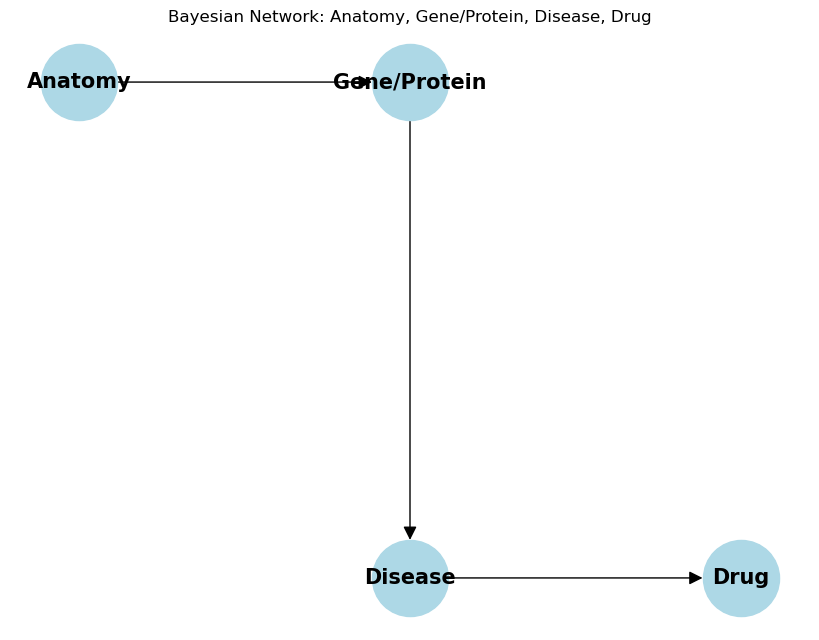

In [82]:
from pgmpy.models import BayesianNetwork
import networkx as nx
import matplotlib.pyplot as plt

# Define the Bayesian Network
model = BayesianNetwork([
    ("Anatomy", "Gene/Protein"), 
    ("Gene/Protein", "Disease"), 
    ("Disease", "Drug")
])

# Convert to NetworkX DiGraph
G = nx.DiGraph()
G.add_nodes_from(model.nodes())
G.add_edges_from(model.edges())

# Custom node positions
pos = {
    "Anatomy": (0, 2),
    "Gene/Protein": (2, 2),
    "Disease": (2, 0),
    "Drug": (4, 0)
}

# Draw the network
plt.figure(figsize=(8, 6))
nx.draw(
    G, pos, with_labels=True, node_size=3000, node_color="lightblue", 
    font_size=15, font_weight="bold", arrowsize=20
)

plt.title("Bayesian Network: Anatomy, Gene/Protein, Disease, Drug")
plt.show()


In [ ]:
pip freeze > Hina_Ghazanfar_requirements.txt

# **With given data....conditional probabilities and joint probability distributions are calculated based on counts**

In [94]:
import pymc as pm
import numpy as np

# Relevant counts based on the dataset and DAG
relevant_counts = {
    "anatomy_protein_present": 1518203,
    "anatomy_protein_absent": 19887,
    "disease_protein": 80411,
    "contraindication": 30675,
    "off_label_use": 2568,
    "indication": 9388
}

# Calculate total count for the DAG
total_count = sum(relevant_counts.values())

# Probabilities based on the relevant counts
P_Anatomy = (relevant_counts["anatomy_protein_present"] + relevant_counts["anatomy_protein_absent"] )/ total_count
P_Protein_given_Anatomy = relevant_counts["anatomy_protein_present"] / (
    relevant_counts["anatomy_protein_present"] + relevant_counts["anatomy_protein_absent"]
)
P_Protein_absent_Anatomy = relevant_counts["anatomy_protein_absent"] / (
    relevant_counts["anatomy_protein_present"] + relevant_counts["anatomy_protein_absent"]
)
P_Disease_given_Protein = relevant_counts["disease_protein"] / relevant_counts["anatomy_protein_present"]

#P_Drug_given_Disease = (relevant_counts["contraindication"] + relevant_counts["off_label_use"] + relevant_counts["indication"]) / (
#    relevant_counts["contraindication"] + relevant_counts["off_label_use"] + relevant_counts["indication"] + total_count
#)
P_Drug_given_Disease = (relevant_counts["indication"]) / (
    relevant_counts["contraindication"] + relevant_counts["off_label_use"] + relevant_counts["indication"]
)

P_contraindication = (relevant_counts["contraindication"]) / (
    relevant_counts["contraindication"] + relevant_counts["off_label_use"] + relevant_counts["indication"]
)

print("P_Anatomy: ",P_Anatomy)

print("P_Protein_given_Anatomy: ",P_Protein_given_Anatomy)

print("P_Disease_given_Protein: ",P_Disease_given_Protein)

print("P_Drug_given_Disease: ",P_Drug_given_Disease)

# Define Bayesian network using PyMC
with pm.Model() as model:
    # Root node: Anatomy
    Anatomy = pm.Bernoulli("Anatomy", P_Anatomy)

    # Conditional: Protein given Anatomy
    #Protein = pm.Bernoulli("Protein", pm.math.switch(Anatomy, P_Protein_given_Anatomy, 1 - P_Protein_given_Anatomy))
    Protein = pm.Bernoulli("Protein", pm.math.switch(Anatomy, P_Protein_given_Anatomy, P_Protein_absent_Anatomy))

    # Conditional: Disease given Protein
    Disease = pm.Bernoulli("Disease", pm.math.switch(Protein, P_Disease_given_Protein, 1 - P_Disease_given_Protein))

    # Conditional: Drug given Disease
   # Drug = pm.Bernoulli("Drug", pm.math.switch(Disease, P_Drug_given_Disease, 1 - P_Drug_given_Disease))
    Drug = pm.Bernoulli("Drug", pm.math.switch(Disease, P_Drug_given_Disease, P_contraindication))

    # Sampling
    trace = pm.sample(2000, tune=1000, random_seed=42)
    # Convert the trace to a DataFrame
trace_data = trace.to_dataframe(groups="posterior")

# Example analysis
p_anatomy = trace_data["Anatomy"].mean()
p_protein_given_anatomy = trace_data[(trace_data["Anatomy"] == 1) & (trace_data["Protein"] == 1)].shape[0] / trace_data[trace_data["Anatomy"] == 1].shape[0]
p_disease_given_protein = trace_data[(trace_data["Protein"] == 1) & (trace_data["Disease"] == 1)].shape[0] / trace_data[trace_data["Protein"] == 1].shape[0]
p_drug_given_disease = trace_data[(trace_data["Disease"] == 1) & (trace_data["Drug"] == 1)].shape[0] / trace_data[trace_data["Disease"] == 1].shape[0]

print(f"P(Anatomy): {p_anatomy}")
print(f"P(Protein | Anatomy): {p_protein_given_anatomy}")
print(f"P(Disease | Protein): {p_disease_given_protein}")
print(f"P(Drug | Disease): {p_drug_given_disease}")

#Joint Probabilities
# Calculate the joint probability from the posterior samples
joint_probabilities = (
    trace_data["Anatomy"] *
    (trace_data["Protein"] * (trace_data["Anatomy"] == 1) + (1 - trace_data["Protein"]) * (trace_data["Anatomy"] == 0)) *
    (trace_data["Disease"] * (trace_data["Protein"] == 1) + (1 - trace_data["Disease"]) * (trace_data["Protein"] == 0)) *
    (trace_data["Drug"] * (trace_data["Disease"] == 1) + (1 - trace_data["Drug"]) * (trace_data["Disease"] == 0))
)

# Mean of the joint probability (empirical average over all samples)
joint_probability = joint_probabilities.mean()
print(f"Joint Probability: {joint_probability}")

P_Anatomy:  0.925928824440201
P_Protein_given_Anatomy:  0.9870703274840874
P_Disease_given_Protein:  0.05296459037427801
P_Drug_given_Disease:  0.22021533625765288


Output()

P(Anatomy): 0.924875
P(Protein | Anatomy): 0.9870252736856332
P(Disease | Protein): 0.05867067833698031
P(Drug | Disease): 0.2375586854460094
Joint Probability: 0.013625


**2.	Select a drug and compute the anatomical region with which it is most likely to be associated. Are your findings consistent with what is known about the drug from its node attributes (or other sources)?**

In [96]:
import pymc as mc
import numpy as np


# Trace for the Drug variable
drug_trace = trace_data["Drug"]

# Filter the samples where Drug = 1
drug_1_samples = drug_trace == 1

# Anatomical Region samples corresponding to Drug = 1
anatomy_samples_given_drug_1 = trace_data["Anatomy"][drug_1_samples]

# Calculate the posterior probability distribution of Anatomical Region given Drug=1
unique, counts = np.unique(anatomy_samples_given_drug_1, return_counts=True)
P_A_given_drug_1 = counts / len(anatomy_samples_given_drug_1)

# Output the probabilities
for anatomical_region, probability in zip(unique, P_A_given_drug_1):
    print(f"P(Anatomical Region = {anatomical_region} | Drug = 1) = {probability}")


P(Anatomical Region = 0 | Drug = 1) = 0.03132161955691368
P(Anatomical Region = 1 | Drug = 1) = 0.9686783804430863


In [102]:
# Filter the table for rows where x_type or y_type is 'disease'
drug_rows = filtered_counts_df[
    (filtered_counts_df['x_type'] == 'drug') | (filtered_counts_df['y_type'] == 'drug')
]

# Extract the names and types of diseases
drug_info = drug_rows[['x_type', 'y_type', 'relation', 'count']]

# Display the result
print(drug_info)


          x_type        y_type          relation    count
0           drug          drug         drug_drug  2672628
7        disease          drug  contraindication    30675
8           drug       disease  contraindication    30675
10          drug  gene/protein      drug_protein    25653
11  gene/protein          drug      drug_protein    25653
14       disease          drug        indication     9388
15          drug       disease        indication     9388
16          drug       disease     off-label use     2568
17       disease          drug     off-label use     2568


In [104]:
# Step 1: Filter relevant relationships involving anatomy, disease, gene/protein, and drug
relevant_relationships = data[
    (data['x_type'].isin(['anatomy', 'disease', 'gene/protein', 'drug'])) &
    (data['y_type'].isin(['anatomy', 'disease', 'gene/protein', 'drug']))
]

# Step 2: Create a dictionary to represent the relationships
# This will allow us to traverse the relationships
relationship_dict = {}
for _, row in relevant_relationships.iterrows():
    x = row['x_type']
    y = row['y_type']
    relation = row['relation']
    if x not in relationship_dict:
        relationship_dict[x] = []
    relationship_dict[x].append((y, relation))

# Step 3: Traverse the relationships to find drugs indirectly connected to anatomy
def find_indirect_connections(start, end, relationship_dict, path=[]):
    path = path + [start]
    if start == end:
        return [path]
    if start not in relationship_dict:
        return []
    paths = []
    for (node, relation) in relationship_dict[start]:
        if node not in path:  # Avoid cycles
            new_paths = find_indirect_connections(node, end, relationship_dict, path)
            for new_path in new_paths:
                paths.append(new_path)
    return paths

# Find all paths from 'anatomy' to 'drug'
indirect_paths = find_indirect_connections('anatomy', 'drug', relationship_dict)

# Step 4: Extract drugs from the paths
drug_set = set()
for path in indirect_paths:
    if 'drug' in path:
        drug_set.add(path[-1])  # Add the drug node at the end of the path

# Step 5: Display the results
print("Drugs indirectly connected to anatomy through disease and gene/protein:")
for drug in drug_set:
    print(drug)


Drugs indirectly connected to anatomy through disease and gene/protein:
drug
